In [40]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

In [41]:
cellLength = 30 
cellWidth = 20
cell = mp.Vector3(cellLength,cellWidth) 

In [42]:
#Area Size in µm

In [43]:
wavelength = 1.55
n = 3.4                 # index of waveguide
w = 0.4                 # width of waveguide
r = 6.8                 # inner radius of ring
pad = 0.3               # padding between waveguide and edge of PML
psrc = r+1.5*w+pad

In [44]:
c1 = mp.Cylinder(radius=r+w, material=mp.Medium(index=n),center=mp.Vector3(0,0))
c2 = mp.Cylinder(radius=r,center=mp.Vector3(0,0))
b1 = mp.Block(mp.Vector3(mp.inf,w,mp.inf),
                 center=mp.Vector3(0,-psrc),
                 material=mp.Medium(index=n))
b2 = mp.Block(mp.Vector3(mp.inf,w,mp.inf),
                 center=mp.Vector3(0,psrc),
                 material=mp.Medium(index=n))

In [45]:
geometry = [c1,c2,b1,b2]

In [46]:
# Waveguide:length,width,height - position - material

In [47]:
pml_layers = [mp.PML(1)] # perfectly matched layer (PML)
resolution = 12 #pixels per distance unit 10 pixels/µm

In [48]:
sources = [mp.Source(mp.ContinuousSource(frequency=1/wavelength),
                     component=mp.Ez,
                     center=mp.Vector3(-mp.inf,psrc),
                     size=mp.Vector3(0,0.5))]

In [49]:
# Recall that, in Meep units, frequency is specified in units of 2πc
# which is equivalent to the inverse of the vacuum wavelength. 
# Thus, 0.15 corresponds to a vacuum wavelength of about 1/0.15=6.67 µm
# line source

In [50]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

sim.run(mp.at_beginning(mp.output_epsilon),
        mp.to_appended("ez", mp.at_every(0.6, mp.output_efield_z)),
        until=200)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000181913 s
Working in 2D dimensions.
Computational cell is 30 x 20 x 0 with resolution 12
     cylinder, center = (0,0,0)
          radius 7.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (11.56,11.56,11.56)
     cylinder, center = (0,0,0)
          radius 6.8, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,-7.7,0)
          size (1e+20,0.4,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.56,11.56,11.56)
     block, center = (0,7.7,0)
          size (1e+20,0.4,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.56,11.56,11.56)
time for set_epsilon = 0.376363 s
-----------
creating output file "./eps-000000.00.h5"...
creating output file "./ez.h5"...
Meep progress: 152.83333333333331/200.0 = 76.4% done in 4.0s, 1.2s to g

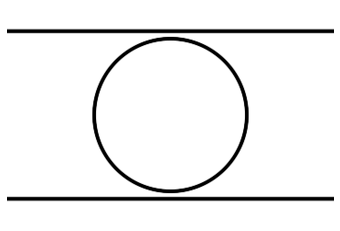

In [51]:
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

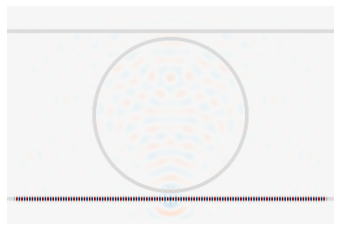

In [52]:
ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
plt.axis('off')
plt.show()